In [ ]:
# This code was written by Luka Skolc (ETHZ) under the supervision of Krzysztof Barczynski (PMOD/WRC & ETHZ),
# Nils Janitzek (PMOD/WRC & ETHZ) and Louise Harra (PMOD/WRC & ETHZ) in the scope of the ETH Studio 
# Davos Internship in 2023. The work on the code began in March 2023.

In [1]:
import sunpy.map
import sunpy.data.sample  
import sunpy

import numpy as np
import scipy.optimize as so
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation

from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch

from IPython.display import HTML

%matplotlib notebook


In [2]:
label_dict = ['Index', 'Lifetime', 'Cubic time', 'Cubic intensity', r'Ratio of principal moments $\tilde{I}$', 'Slope of horizontal line fit', 'Fit error of horizontal line fit', 'Backward / forward steps' , 'Backward / forward travel distance', 'Slope of the 45-degree line fit', 'Fit error of the 45-degree line fit', 'R value', 'First expansion time', 'Distance 1', 'Distance 2', 'Time union size', 'Error index', 'y coordinate of footpoint\'s COM', 'x coordinate of footpoint\'s COM']       


In [8]:
classification2 = np.loadtxt('classification2.txt', dtype = int)

no_obj = len(classification2) # Number of all objects
properties2 = np.zeros((no_obj, 20))

no_jets = 0       # Number of jets
no_nonjets = 0    # Number of non-jets
unclassified = 0  # Number of unclassified objects

error_indices_jets = 0     # Number of jets with a non-zero error index
error_indices_nonjets = 0  # Number of non-jets with a non-zero error index

valid = 0 # Number of valid objects for analysis

for k in range(no_obj):
    name_k = make_name(k, 'H', 2) + '.npy'
    properties2[k, :] = np.load(name_k)
    
    if classification2[k] == 0: # Non-jets
        no_nonjets += 1
        #if properties2[k, 16] == 1 or properties2[k, 16] == 3: # Couldn't fit a horizontal line
            #error_indices_nonjets += 1
            #continue
            
    if classification2[k] == 1: # Jets
        no_jets += 1
        #if properties2[k, 16] == 1 or properties2[k, 16] == 3: # Couldn't fit a horizontal line
            #error_indices_jets += 1
            #continue
            
    if classification2[k] == 2: # Unclassified
        unclassified += 1
        continue
    
    valid += 1

print('There are {} jets'.format(no_jets))
print('There are {} non-jets'.format(no_nonjets))
print('{} objects are unclassified\n'.format(unclassified))

print('{} jets have a non-zero error index'.format(error_indices_jets))
print('{} non-jets have a non-zero error index\n'.format(error_indices_nonjets))

print('There are {} valid objects for further analysis'.format(valid))


There are 70 jets
There are 257 non-jets
14 objects are unclassified

0 jets have a non-zero error index
0 non-jets have a non-zero error index

There are 327 valid objects for further analysis


In [32]:
# Always run this cell after changing the two files. It's almost the same as importing functions. 
# Note there may be variable name conflicts if you are not careful.

%run jet_func_analysis.ipynb
%run jet_func_plotting.ipynb


In [69]:
print(np.load(make_name(285, 'H', 2) + '.npy'))

[2.85000000e+02 8.00000000e+00 6.00000000e+01 2.90490000e+04
 4.96557811e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.00000000e+00 2.06690815e+00 2.30075870e+00 1.70000000e+01
 3.00000000e+00 1.62995317e+02 1.68063006e+01 0.00000000e+00]


There are 70 jets remaining
There are 252 non-jets remaining


<IPython.core.display.Javascript object>


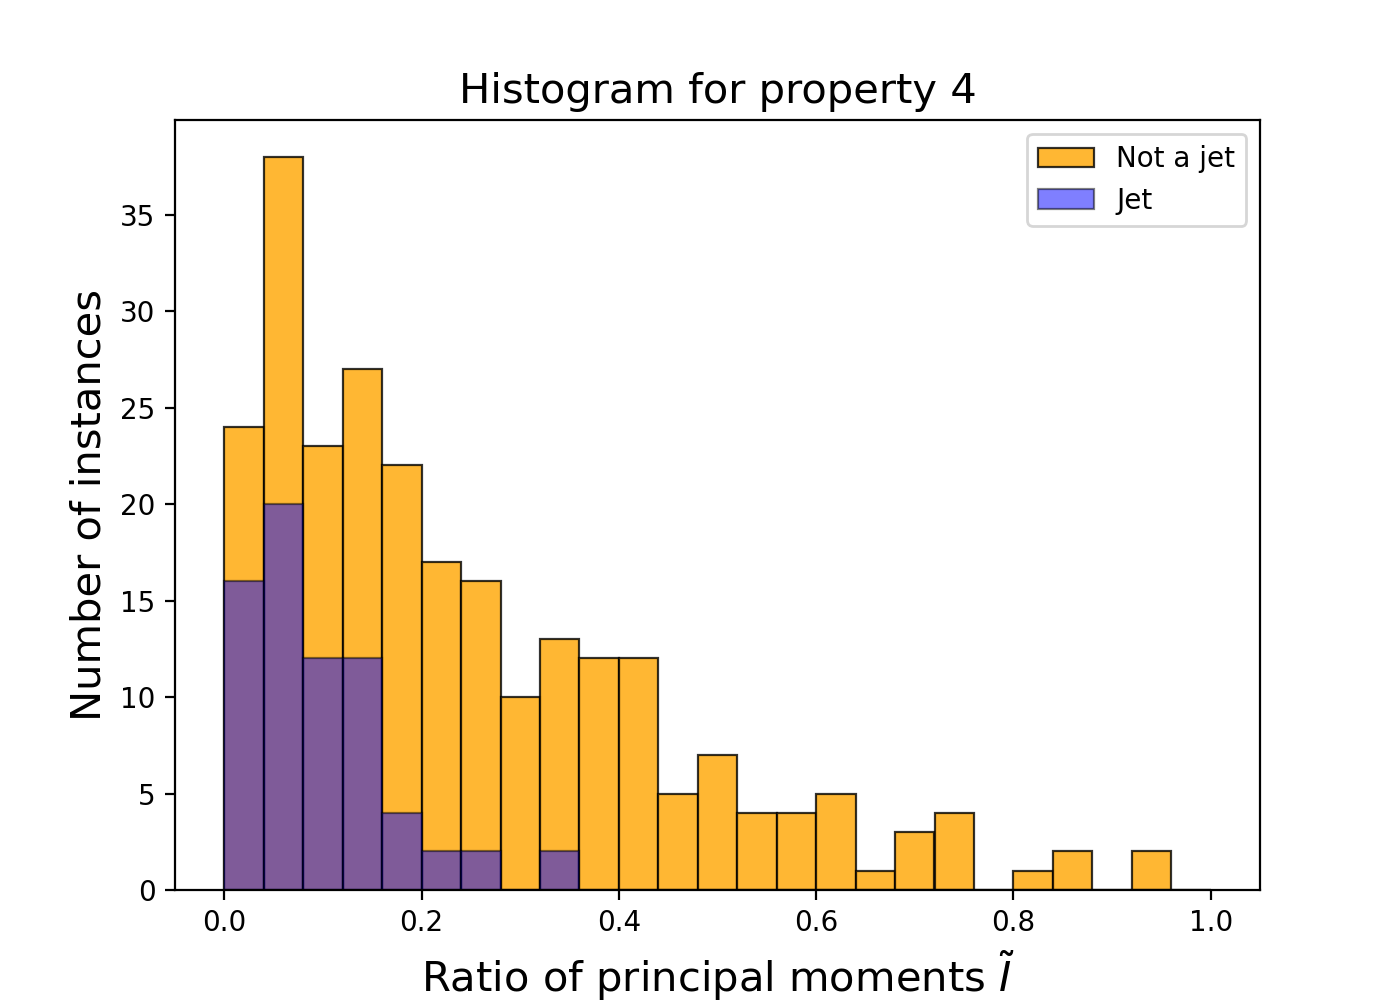

In [10]:
plt.rcParams["figure.figsize"] = (7, 5)
min_length2 = 0 # Objects with shorter first expansion time will be ignored
max_ratio2 = 1  # Objects with larger ratio of principal moments will be ignored
make_histogram(4, properties2, classification2, 25, label_dict, min_length2, max_ratio2)


<IPython.core.display.Javascript object>


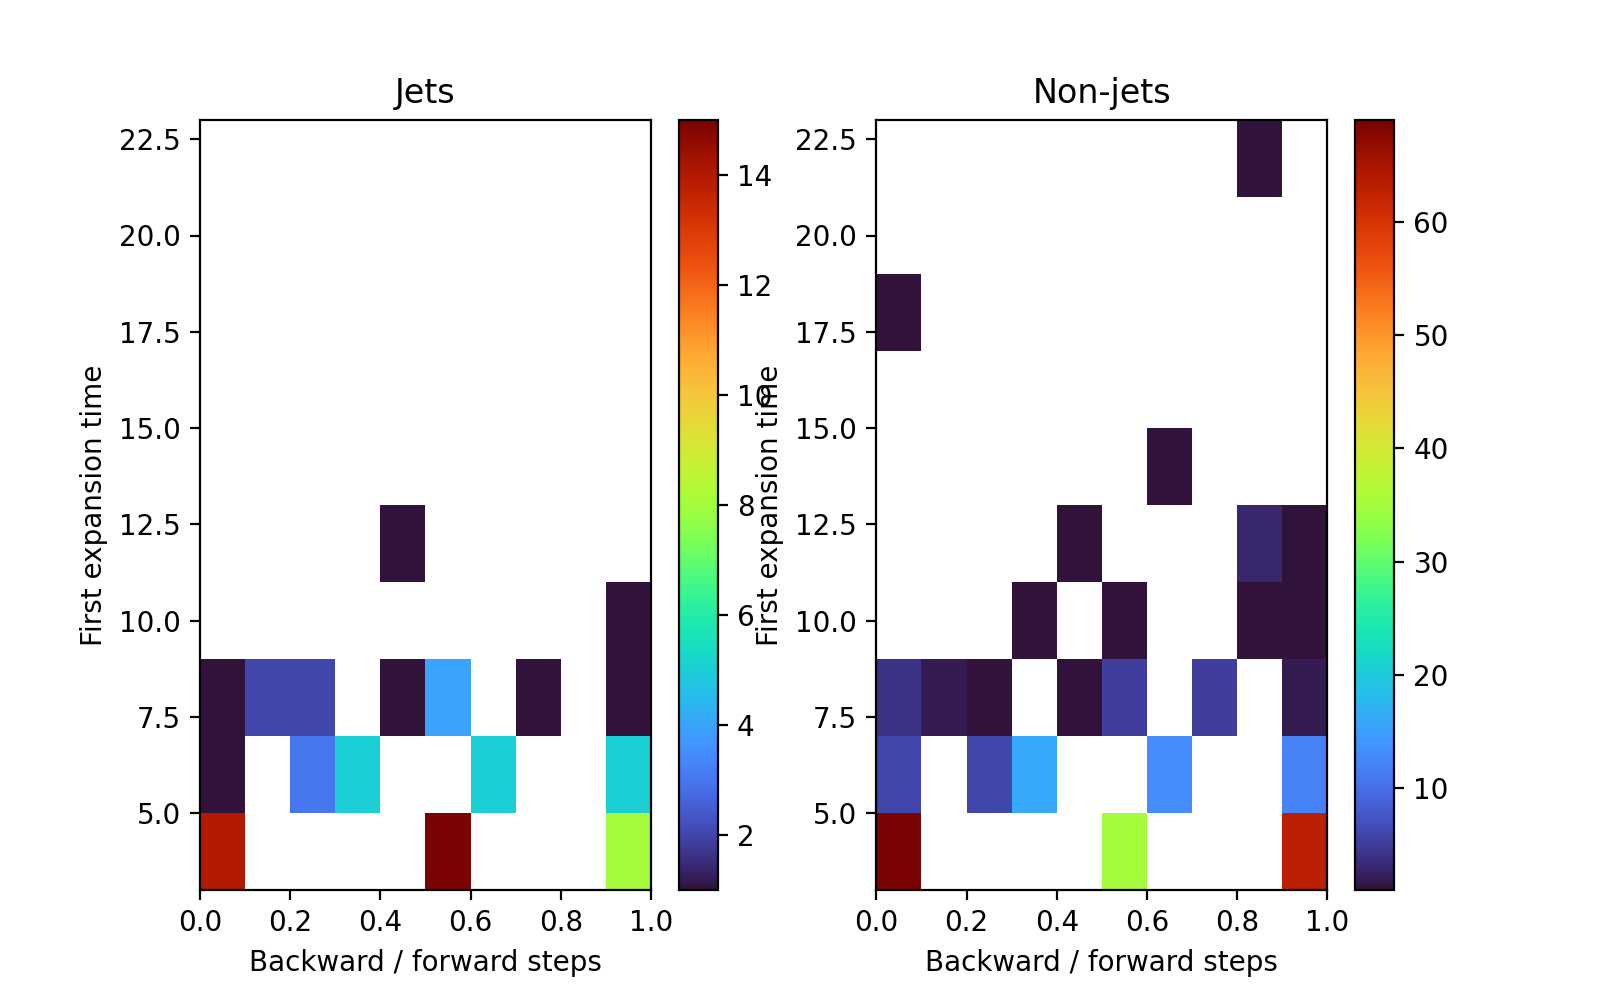

In [50]:
plt.rcParams["figure.figsize"] = (8, 5)
min_length2 = 3 # Objects with shorter first expansion time will be ignored
max_ratio2 = 1 # Objects with larger ratio of principal moments will be ignored
make_2dhistogram((7, 12), (10, 10), properties2, classification2, label_dict, min_length2, max_ratio2)


In [ ]:
plt.rcParams["figure.figsize"] = (7, 5)
min_length2 = 3 # Objects with shorter first expansion time will be ignored
max_ratio2 = 1 # Objects with larger ratio of principal moments will be ignored
make_scatterplot((7, 8), properties2, classification2, label_dict, min_length2, max_ratio2)


In [7]:
# Number of jets & non-jets with a value of property "propp" inside the interval (mincut, maxcut)

propp = 4
mincut = 0.
maxcut = 0.18

min_length2 = 0
max_ratio2 = 1

(sj, snj) = sum_histo(propp, (mincut, maxcut), properties2, classification2, min_length2, max_ratio2)

print('{} jets'.format(sj))
print('{} non-jets'.format(snj))

62 jets
122 non-jets


<IPython.core.display.Javascript object>


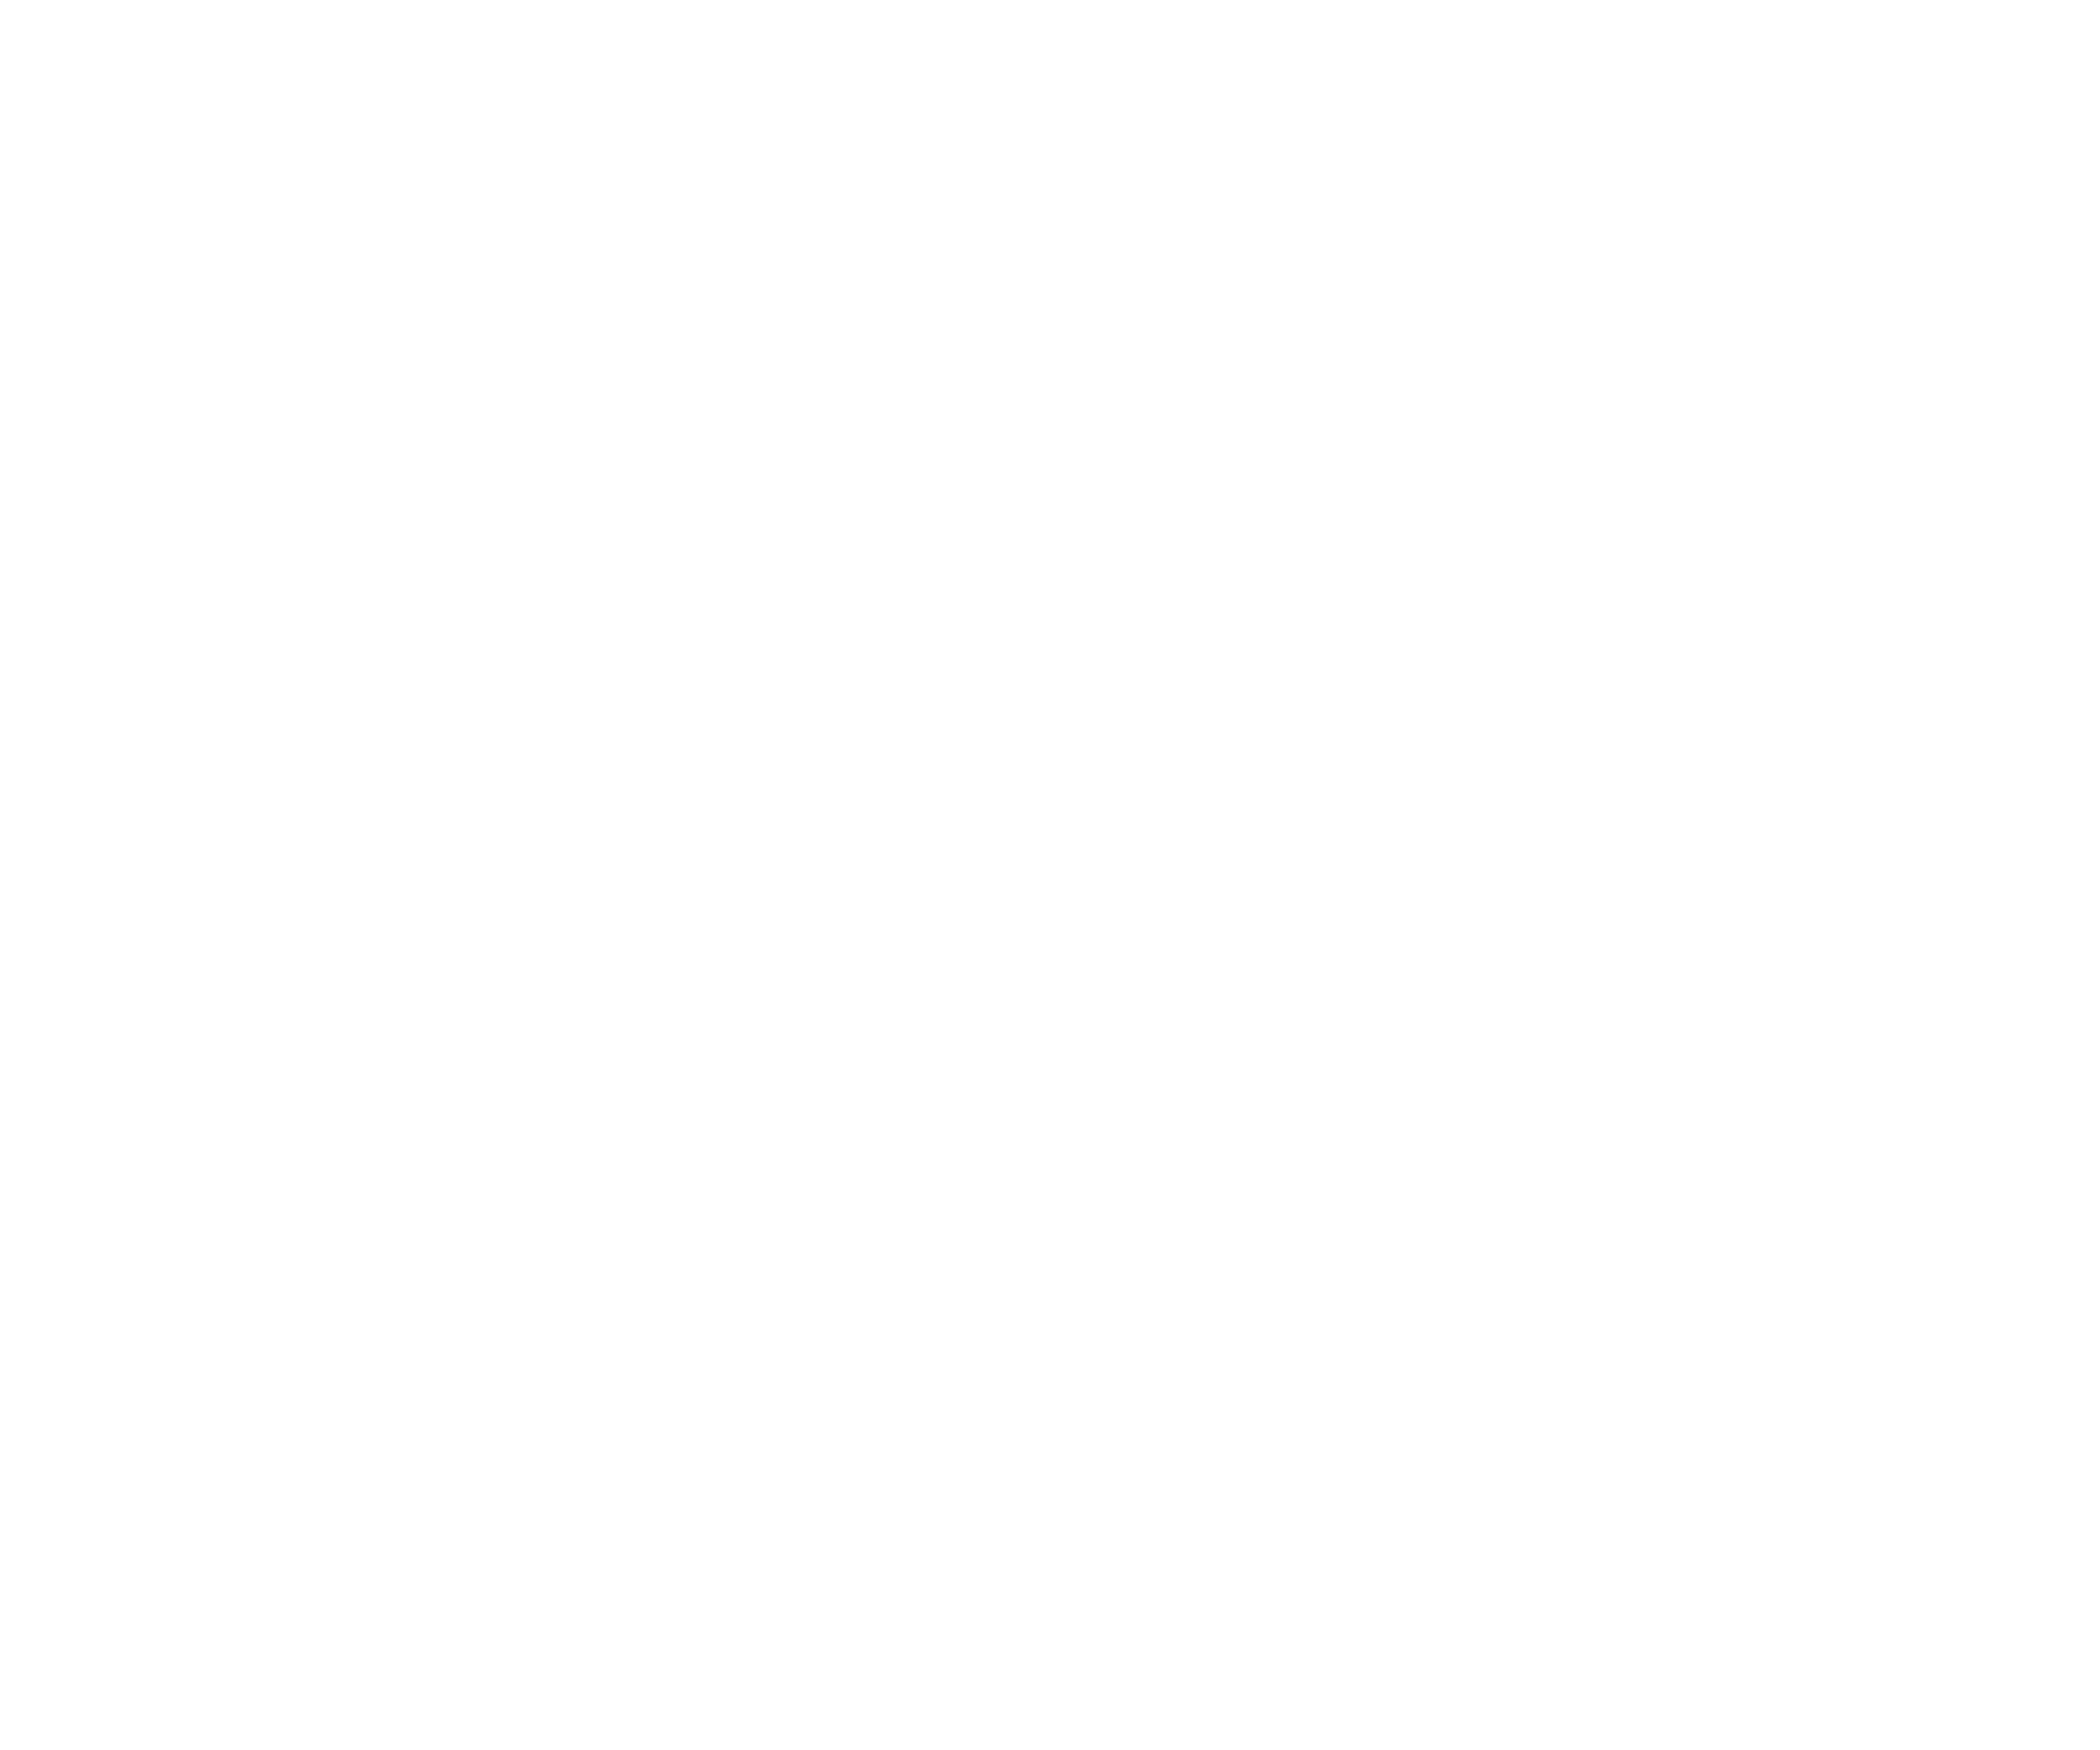

In [33]:
plt.rcParams["figure.figsize"] = (12, 10)
intens_snap = np.load('wide_snapshot_batch2.npy')
batch_number = 2
plot_all_invivo_load(intens_snap, classification2, properties2, 'sdoaia193', batch_number, True)


In [ ]:
indexx = 340
jnj = classification2[indexx]
print(properties2[indexx, 4])
print(jnj)
                